# Elements Of Data Processing (2021S1) - Week 2
### General Tips for Jupyter Notebook
Cell Running shortcuts:
- `shift + enter` : Run current cell - keyboard shortcut for the <button class='btn btn-default btn-xs'><i class="fa-play fa"></i><span class="toolbar-btn-label">Run</span></button> button
- `ctrl + enter` : Run selected cells

Command mode (press `esc` to enter):
- Enter command mode pressing `esc` (blue highlight)
- `a` to create a cell **above**
- `b` to create a cell **below**
- `dd` (double d) to **delete** a cell
- `m` to make the cell render in **markdown**
- `r` to make the cell render in **raw** text
- `y` to make the cell render python code
- `enter` to "edit" the cell

### Visualization with Python
- Today we will cover the most common plotting library `matplotlib` and different forms of visualizations.
- `matplotlib` is a Python 2D plotting library that enables you to produce figures and charts, both in a screen or in an image file. Animations are also supported for interactive notebooks.
- Alternative libraries include `seaborn`, `pandas.plot`, `bokeh`, `folium`, `plotly`
- `matplotlib` documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot
- You will often find yourself on stack overflow finding ancient answers written by fossils (a word for old programmers) when it comes to formatting a visualisation (i.e axis ticks, labels, rotations, colours, etc)

### Box Plots
- The following example demonstrates a boxplot (or box-and-whisker plot) of the top 100 emissions in 2010, using the emmisions dataset seen in previous labs. 
- A boxplot is a plot that displays a statistical summary of the quartiles of a dataset.
- Boxplot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

# we give the library module alias plt
import matplotlib.pyplot as plt

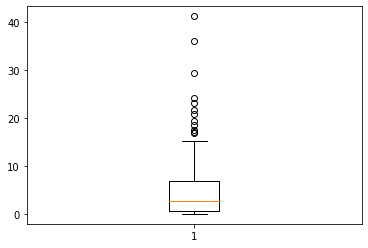

In [2]:
df = pd.read_csv('data/emission.csv',encoding = 'ISO-8859-1')

# drop all nan values (or you can impute them with 0...)
df_2010 = df['2010'].dropna()

plt.boxplot(df_2010)

plt.show()

Alternatively using `%matplotlib inline` instead of `plt.show()`

([<matplotlib.axis.XTick at 0x7f6db38e67c0>], [Text(1, 0, 'Emissions')])

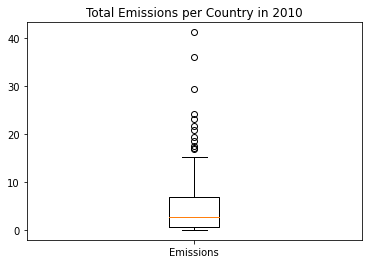

In [3]:
%matplotlib inline

plt.boxplot(df_2010)

# some arguments to help make the plot easier for analysis
plt.title("Total Emissions per Country in 2010") # set the title
plt.xticks([1], ["Emissions"]) # display x=1 as "Emissions" 

In [4]:
# confirm summary statistics
df['2010'].dropna().describe()

count    202.000000
mean       5.002337
std        6.269126
min        0.022480
25%        0.677967
50%        2.707627
75%        6.802481
max       41.131162
Name: 2010, dtype: float64

### Scatter Plots
- One of the most common plots which are used to display the relationship between two variables (x vs y).
- For this example, we will use the Iris dataset (one of the "go-to" datasets for tutorials)
- The dataset provides measurements on various parts of three types of Iris flower (Iris setosa, Iris versicolour, and Iris virginica)
- For each of the three types, there are 50 measurements (aka samples or instances). 
- Each data row in the CSV file contains (1) petal width, (2) sepal width, (3) petal length, (4) sepal length, and (5) the type of Iris flower.
- This example will plot petal length vs petal width for all three types.

In [5]:
df_iris = pd.read_csv('data/iris.csv',encoding = 'ISO-8859-1')

display(df_iris.sample(5)) # display 5 random rows

# filter/locate the data required
setosa = df_iris.loc[df_iris['Name'] == 'Iris-setosa']
veriscolor = df_iris.loc[df_iris['Name'] == 'Iris-versicolor']
virginica = df_iris.loc[df_iris['Name'] == 'Iris-virginica']

# define an array of flowers
flowers = (setosa, veriscolor, virginica)

# define an array of different colours
colours = ('g', 'r', 'b')

PetalWidth  SepalWidth  PetalLength  SepalLength             Name
41         0.3         2.3          1.3          4.5      Iris-setosa
96         1.3         2.9          4.2          5.7  Iris-versicolor
81         1.0         2.4          3.7          5.5  Iris-versicolor
98         1.1         2.5          3.0          5.1  Iris-versicolor
86         1.5         3.1          4.7          6.7  Iris-versicolor

Here's a list of all the wonderful colours for `matplotlib`: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

Just note, that they use the American spelling (colour) vs Australian spelling (colour).

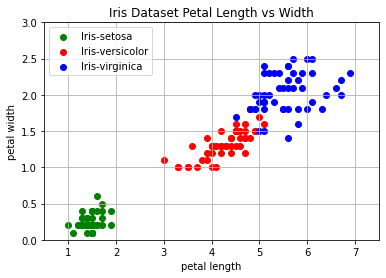

In [6]:
for flower, c in zip(flowers, colours):
    # get the name of the flower for labels
    name = flower['Name'].values[0] 
    plt.scatter(flower['PetalLength'], flower['PetalWidth'], color=c, label=name)
    # if you provide a label, then you can call plt.legend() to display the label name!
    
# some arguments for the overall plot
plt.ylabel("petal width")
plt.xlabel("petal length")
plt.title("Iris Dataset Petal Length vs Width")
plt.xlim(0.5,7.5)
plt.ylim(0,3)
plt.grid(True)
plt.legend()

plt.show()

#### Inferences
- We can visually see that each flower has a distinct cluster
- For example, Iris-Versicolour seems to have a positive linear relationship (if petal length increases, so does petal width)

### <span style="color:blue"> Exercise 1 </span> 


Modify the example above to generate the scatter plot of sepal length and petal width.


In [7]:
##answer here



### Bar Charts
- Another common type of chart
- Depending on the dataset, it may be more "interesting" to sort the data 
- Typically provide comparisons or contrasts between different entities.
- Example below displays the GNP per capita of the three poorest vs three richest countries in the world
- Source: 2004 GNP per capita

`np.arrange()` is the numpy equivalent of `range()`. See https://stackoverflow.com/questions/10698858/built-in-range-or-numpy-arange-which-is-more-efficient for more details

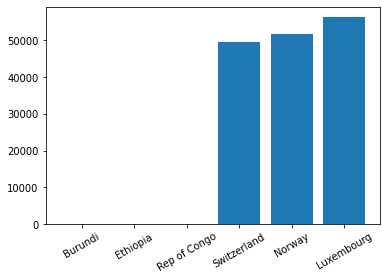

In [8]:
countries = ['Burundi','Ethiopia','Rep of Congo','Switzerland','Norway','Luxembourg']
gnp = [90, 110, 110, 49600, 51810, 56380] # GNP per capita data (2004)

plt.bar(np.arange(len(gnp)), gnp)

# set the rotation of the x-values to 30 degrees
# also, for each x-val between 0 and 5, display the country name instead
plt.xticks(np.arange(len(countries)), countries, rotation=30)

plt.show()

(Advanced) As you can see, because the scale difference is so high, we really can't gain much information about the poorest countries. One way to visualise it in a better way is to plot the log.

- To get the original values, you take the `exp()` (exponential) of the log scale. 
- For example, $\log(56380) = 10.9398$. To get the original value, we take $\exp(10.9398) = 56380$

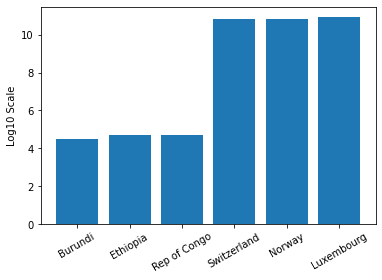

In [9]:
log_gnp = [np.log(i) for i in gnp]

plt.bar(np.arange(len(gnp)), log_gnp)

plt.xticks(np.arange(len(countries)), countries, rotation=30)
plt.ylabel("Log10 Scale")

plt.show()

### <span style="color:blue"> Exercise 2 </span> 


Modify the bar chart example to plot the average maximum temperature in all major Australian cities. The data is available [here](data/max_temp.csv). 


In [10]:
##answer here





(From the Lab - Advanced) 
- You can also display several measurements for each entity of interest using a **clustered bar chart**. 
- For example, the clustered bar chart below simultaneously shows the number of births and deaths in four countries of interest.
- The number of births is displayed as the blue-colored bar and the number of deaths as the red-colored bar.

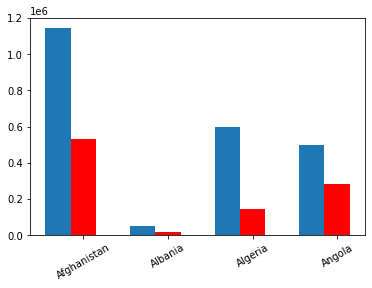

In [11]:
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola']

births = [1143717, 53367, 598519, 498887]
deaths = [529623, 16474, 144694, 285380]

plt.bar(np.arange(len(births))-0.3, births, width=0.3)
plt.bar(np.arange(len(deaths)), deaths, width=0.3,color='r')

plt.xticks(np.arange(len(countries)),countries, rotation=30)

plt.show()

### Histograms
- One of the most useful plotting devices (alongside scatterplots) which plot the **distribution** of your dataset
- Typically used for datasets with large $n$ (number of rows/instances, such as age of population).
- Approximating the distribution requires some statistical background and is not required in this subject (though you should probably know what the Normal distribution looks like).
- The example below creates a histogram of age within a small number of samples.

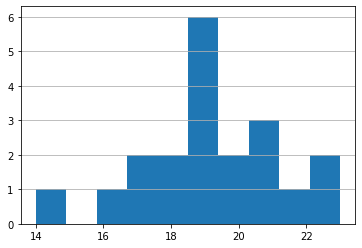

In [12]:
from random import choice

ages = [17,18,18,19,21,19,19,21,20,23,19,22,20,21,19,19,14,23,16,17]

plt.hist(ages, bins=10) # you will cover histogram bins at a later date, so don't worry about it for now.

plt.grid(which='major', axis='y')

plt.show()

### <span style="color:blue"> Exercise 3 </span> 


- Change the number of bins in the previous example to 20.
- Plot the histogram
- (Advanced) What's the difference?


In [13]:
#Answer 3


### Parallel Coordinates (PC)
- Parallel coordinates represents each numerical data instance (row) as a line and each column (feature).
- This can be useful in certain circumstances as similar features can be identified by the similarity of their lines.
- This also allows correlations between adjacent features to be identified.

Questions: 
1. Does the ordering of columns matter?
2. Why might we want to "normalise" our data. Normalising means to scale it (typically) to the Normal distribution or between 0 and 1.

The following dataset "Auto MPG" [(this file)](data/mpg.csv) is a classic dataset providing detail about different models of cars in the 1970s and 1980s.  It uses features such as number of cylinders, horsepower, weight, ..., miles per gallon

In [14]:
from pandas.plotting import parallel_coordinates as PC

df_pc = pd.read_csv('data/mpg.csv',encoding = 'ISO-8859-1')
df_pc.tail()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
387  27.0          4         140.0          86    2790          15.6   
388  44.0          4          97.0          52    2130          24.6   
389  32.0          4         135.0          84    2295          11.6   
390  28.0          4         120.0          79    2625          18.6   
391  31.0          4         119.0          82    2720          19.4   

     model_year  origin             name  
387          82       1  ford mustang gl  
388          82       2        vw pickup  
389          82       1    dodge rampage  
390          82       1      ford ranger  
391          82       1       chevy s-10

- We seem to have a string based column which won't be useful for PC. 
- `name` is a class feature (label for the type of car for this dataset) which is used to colour them, but for this example we want them to all be the same colour. If we set the `name` column to be empty, they will all result in the same colour.
- (Advanced) You can make it a categorical feature to determine the line colours. 

In [15]:
df_pc['name'] = ''

In [16]:
def normalise(data):
    """
    function to normalise an array or series of data.
    """
    _min, _max = data.min(), data.max()
    return (data - _min) / (_max - _min)

In [17]:
# normalise the data
cols = ('mpg', 'weight', 'cylinders', 'horsepower', 'model_year')

for col in cols:
    df_pc[col] = normalise(df_pc[col])

No handles with labels found to put in legend.


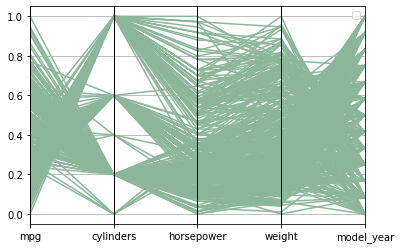

In [18]:
PC(df_pc[['mpg','cylinders','horsepower','weight','model_year','name']], 'name')

plt.show()

### <span style="color:blue"> Exercise 4 </span> 

Consider this parallel co-ordinates plot above.  What insights can obtain from this plot?    To make it easier to visualise, you may like to display fewer car_models (objects) altering the code above and using `pd.DataFrame.sample(n)`


No handles with labels found to put in legend.


<AxesSubplot:>

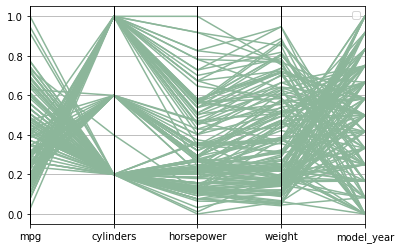

In [19]:
PC(df_pc[['mpg','cylinders','horsepower','weight','model_year','name']].sample(150), 'name')

### <span style="color:blue"> Exercise 5 </span> 
Select car models with years in the range 1980-1982 and make them green in the parallel co-ordinates plot.  Colour all others car models red.  This technique is called "brushing", since it is used to make a particular subset of the objects stand out.   What do you notice?

In [20]:
###Exercise 5 answer



### (Extra) Heatmaps
- Heatmaps are an essential way of displaying aggregated information (i.e correlation, count, etc...)
- Most notably used in geospatial maps or choropleth maps (more in MAST30034 - Applied Data Science...)
- Can be used to view correlation.
- Use the `seaborn` library for heatmaps (and alternative statistical visualisations)

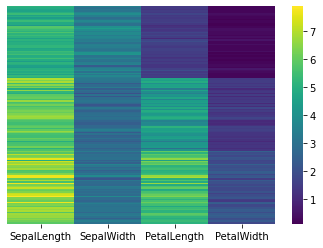

In [21]:
import seaborn as sns

plot_cols = ["SepalLength","SepalWidth","PetalLength","PetalWidth"]

sns.heatmap(df_iris[plot_cols], cmap='viridis', # cmap = colour map (colour scheme)
            xticklabels=True, yticklabels=False)

plt.show()

Not overly useful for this dataset in my opinion. Perhaps, let's take a look at correlation...

In [22]:
df_iris.corr()

PetalWidth  SepalWidth  PetalLength  SepalLength
PetalWidth     1.000000   -0.356544     0.962757     0.817954
SepalWidth    -0.356544    1.000000    -0.420516    -0.109369
PetalLength    0.962757   -0.420516     1.000000     0.871754
SepalLength    0.817954   -0.109369     0.871754     1.000000

<AxesSubplot:>

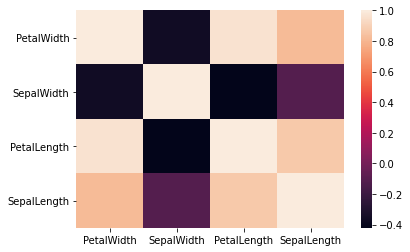

In [23]:
sns.heatmap(df_iris.corr())

- We ignore the diagonals (since they are testing correlation between X and X instead of X and Y)
- We can see that darker colours indicate negative correlation, and lighter colours with positive correlation
- `SepalWidth` seems to be negatively correlated with `SepalLength` (but does not imply or mean that this is the case).
- Be careful with *wording* when it comes to correlation. **Correlation does not imply causality**.
- For example, try something like "*There may be a negative linear relation between `SepalWidth` and `SepalLength`*" instead of "*There is a negative linear correlation between `SepalWidth` and `SepalLength`*".

In [32]:
df_taxi = pd.read_csv("data/sample.csv")
df_taxi.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
99995         2        4/12/15 22:55         4/12/15 23:03                1   
99996         1        4/12/15 22:55         4/12/15 23:08                1   
99997         1        4/12/15 22:55         4/12/15 23:01                1   
99998         2        4/12/15 22:55         4/12/15 23:17                1   
99999         2        4/12/15 22:55         4/12/15 22:59                2   

       trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
99995           0.75        -73.994370        40.746239           1   
99996           2.40        -73.968346        40.759735           1   
99997           0.80        -73.993484        40.742168           1   
99998           4.73        -73.984993        40.747929           1   
99999           0.80        -73.975731        40.751968           1   

      store_and_fwd_flag  dropoff_longitude  ...  payment_type  fare_amount  \
99995                  N         -73.980774  ...             2          6.5   
99996                  N         -73.969879  ...             2         11.0   
99997                  N         -73.984390  ...             1          6.0   
99998                  N         -73.981552  ...             1         18.5   
99999                  N         -73.981247  ...             1          4.5   

       extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
99995    0.5      0.5        0.00           0.0                    0.3   
99996    0.5      0.5        0.00           0.0                    0.3   
99997    0.5      0.5        1.45           0.0                    0.3   
99998    0.5      0.5        3.96           0.0                    0.3   
99999    0.5      0.5        1.16           0.0                    0.3   

       total_amount  PickupCell DropoffCell  
99995          7.80       25:69       27:68  
99996         12.30       27:64       24:60  
99997          8.75       25:69       26:67  
99998         23.76       26:68       33:76  
99999          6.96       27:66       27:68  

[5 rows x 21 columns]

### (Advanced) Geospatial Heatmaps
- `folium` and `bokeh` are the two commonly used libraries for geospatial visualisations.
- Example below (you are not required to know this, but in case your second project relies on geospatial data, this may be useful)

In [39]:
import folium
from folium.plugins import HeatMap

COORDS = ['pickup_latitude', 'pickup_longitude']
nyc = folium.Map(location=[40.66, -73.94], tiles="Stamen Terrain", zoom_start=10)
nyc.add_child(HeatMap(df_taxi[COORDS].values, radius=10))

nyc